In [22]:
import sys
import os
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append('ballbeam-gym')

from ballbeam_gym.envs.setpoint import BallBeamSetpointEnv


kwargs = {'timestep': 0.05, 
          'setpoint': 2,
          'beam_length': 5.0,
          'max_angle': 0.2,
          'init_velocity': 0.0,
          'action_mode': 'continuous'}

env = BallBeamSetpointEnv(**kwargs)
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=20000)

obs = env.reset()

ep_reward_list = []
# To store average reward history of last few episodes
avg_reward_list = []
episodic_reward = 0
obs_list = []
for ep in range(1000):
    obs = obs.astype(np.float)
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    obs_list.append(obs)

    episodic_reward += rewards

   
    print("Episode * {} * Avg Reward is ==> {}, action = {}".format(ep, episodic_reward, action))
    avg_reward_list.append(episodic_reward)

c:\Users\Notebook Artur\anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
c:\Users\Notebook Artur\Desktop\UFMG\IC\ballbeam-gym\ballbeam_gym\envs\setpoint.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obs = np.array([self.bb.theta, self.bb.x, self.bb.v, self.setpoint])
C:\Users\NOTEBO~1\AppData\Local\Temp/ipykernel_45312/2383638188.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

Episode * 0 * Avg Reward is ==> 0.8117566785919679, action = [0.2]
Episode * 1 * Avg Reward is ==> 1.6270324228455142, action = [0.2]
Episode * 2 * Avg Reward is ==> 2.447089404953133, action = [0.14161354]
Episode * 3 * Avg Reward is ==> 3.270170804698191, action = [-0.2]
Episode * 4 * Avg Reward is ==> 4.094510037911613, action = [-0.2]
Episode * 5 * Avg Reward is ==> 4.921881567817615, action = [0.2]
Episode * 6 * Avg Reward is ==> 5.751629848158047, action = [-0.07396538]
Episode * 7 * Avg Reward is ==> 6.581979691245802, action = [-0.2]
Episode * 8 * Avg Reward is ==> 7.411153977270458, action = [-0.2]
Episode * 9 * Avg Reward is ==> 8.240929617972851, action = [0.2]
Episode * 10 * Avg Reward is ==> 9.073085457217136, action = [0.2]
Episode * 11 * Avg Reward is ==> 9.909407979468424, action = [0.2]
Episode * 12 * Avg Reward is ==> 10.751697018270432, action = [0.2]
Episode * 13 * Avg Reward is ==> 11.598526306319176, action = [-0.16081162]
Episode * 14 * Avg Reward is ==> 12.44903

In [23]:
x_ball = []
for observation in obs_list: 
   x =  observation[1]
   x_ball.append(x)

Text(0.5, 1.0, 'PPO ball position control')

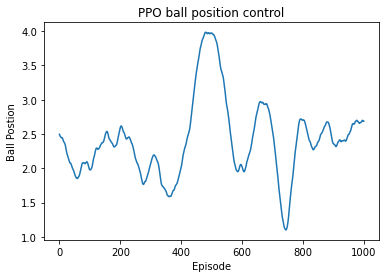

In [26]:
plt.plot(x_ball)
plt.xlabel("Episode")
plt.ylabel("Ball Postion")
plt.title("PPO ball position control")

DDPG

In [14]:
import sys
import os
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append('ballbeam-gym')
from ballbeam_gym.envs.setpoint import BallBeamSetpointEnv

kwargs = {'timestep': 0.05, 
          'setpoint': 2,
          'beam_length': 5.0,
          'max_angle': 0.2,
          'init_velocity': 0.0,
          'action_mode': 'continuous'}

env = BallBeamSetpointEnv(**kwargs)

n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=10000, log_interval=10)

ep_reward_list = []
# To store average reward history of last few episodes
avg_reward_list = []
episodic_reward = 0
obs_list = []
obs = env.reset()
for ep in range(1000):
    obs = obs.astype(np.float)
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    #env.render()
    obs_list.append(obs)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 46.1     |
|    ep_rew_mean     | 33       |
| time/              |          |
|    episodes        | 10       |
|    fps             | 144      |
|    time_elapsed    | 3        |
|    total_timesteps | 461      |
| train/             |          |
|    actor_loss      | -1.78    |
|    critic_loss     | 0.0027   |
|    learning_rate   | 0.001    |
|    n_updates       | 329      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 39.5     |
|    ep_rew_mean     | 29       |
| time/              |          |
|    episodes        | 20       |
|    fps             | 124      |
|    time_elapsed    | 6        |
|    total_timesteps | 789      |
| train/             |          |
|    actor_loss      | -2.86    |
|    critic_loss     |

C:\Users\NOTEBO~1\AppData\Local\Temp/ipykernel_36664/3409308275.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs = obs.astype(np.float)


In [15]:
x_ball = []
setpoint_list = []
for observation in obs_list: 
   x =  observation[1]
   set_point = observation[3]
   x_ball.append(x)
   setpoint_list.append(set_point)
   

Text(0.5, 1.0, 'DDPG ball position control')

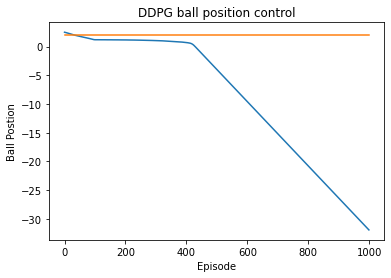

In [16]:
plt.plot(x_ball)
plt.plot(setpoint_list)
plt.xlabel("Episode")
plt.ylabel("Ball Postion")
plt.title("DDPG ball position control")

In [11]:
import sys
import os
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import A2C

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append('ballbeam-gym')
from ballbeam_gym.envs.setpoint import BallBeamSetpointEnv

kwargs = {'timestep': 0.05, 
          'setpoint': 2,
          'beam_length': 5.0,
          'max_angle': 0.2,
          'init_velocity': 0.0,
          'action_mode': 'continuous'}

env = BallBeamSetpointEnv(**kwargs)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50000)

obs = env.reset()
obs_list =[]
for ep in range(1000):
    obs = obs.astype(np.float)
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    obs_list.append(obs)
    #env.render()

c:\Users\Notebook Artur\anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
c:\Users\Notebook Artur\Desktop\UFMG\IC\ballbeam-gym\ballbeam_gym\envs\setpoint.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obs = np.array([self.bb.theta, self.bb.x, self.bb.v, self.setpoint])


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 99       |
|    ep_rew_mean        | 81.9     |
| time/                 |          |
|    fps                | 1290     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.4     |
|    explained_variance | 0.00569  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -23.8    |
|    std                | 0.976    |
|    value_loss         | 145      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 91.2     |
|    ep_rew_mean        | 70.9     |
| time/                 |          |
|    fps                | 1280     |
|    iterations   

C:\Users\NOTEBO~1\AppData\Local\Temp/ipykernel_36664/2171594426.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs = obs.astype(np.float)


In [17]:
x_ball = []
setpoint_list = []
for observation in obs_list: 
   x =  observation[1]
   set_point = observation[3]
   x_ball.append(x)
   setpoint_list.append(set_point)

Text(0.5, 1.0, 'A2C ball position control')

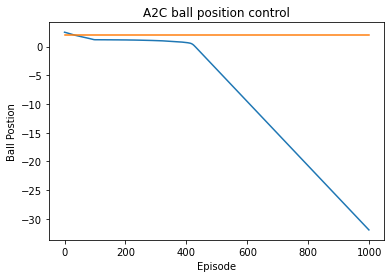

In [18]:
plt.plot(x_ball)
plt.plot(setpoint_list)
plt.xlabel("Episode")
plt.ylabel("Ball Postion")
plt.title("A2C ball position control")

In [43]:
import sys
import os
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import DQN

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append('ballbeam-gym')
from ballbeam_gym.envs.setpoint import BallBeamSetpointEnv

kwargs = {'timestep': 0.05, 
          'setpoint': 2,
          'beam_length': 5.0,
          'max_angle': 0.2,
          'init_velocity': 0.0,
          'action_mode': 'discrete'}

env = BallBeamSetpointEnv(**kwargs)

model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000, log_interval=4)

obs = env.reset()
obs_list = []
for ep in range(1000):
    obs = obs.astype(np.float)
    action, _states = model.predict(obs,deterministic=True)
    obs, rewards, dones, info = env.step(action)
    obs_list.append(obs)
    #env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.2     |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 9750     |
|    time_elapsed     | 0        |
|    total_timesteps  | 273      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.4     |
|    ep_rew_mean      | 40       |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9340     |
|    time_elapsed     | 0        |
|    total_timesteps  | 467      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.7     |
|    ep_rew_mean      | 33.6   

C:\Users\NOTEBO~1\AppData\Local\Temp/ipykernel_45312/552657337.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs = obs.astype(np.float)


In [44]:
x_ball = []
for observation in obs_list: 
   x =  observation[1]
   x_ball.append(x)

Text(0.5, 1.0, 'DQN ball position control')

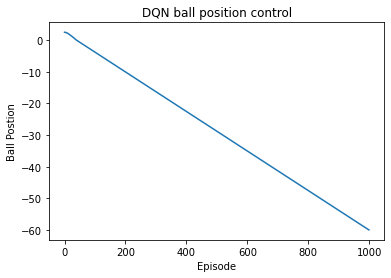

In [45]:
plt.plot(x_ball)
plt.xlabel("Episode")
plt.ylabel("Ball Postion")
plt.title("DQN ball position control")

In [46]:
import sys
import os
import gym
import torch
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines3 import SAC

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append('ballbeam-gym')
from ballbeam_gym.envs.setpoint import BallBeamSetpointEnv


kwargs = {'timestep': 0.05, 
          'setpoint': 3,
          'beam_length': 5.0,
          'max_angle': 0.2,
          'init_velocity': 0.0,
          'action_mode': 'continuous'}

env = BallBeamSetpointEnv(**kwargs)

model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)

obs = env.reset()
obs_list = []
for ep in range(1000):
    obs = obs.astype(np.float)
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    obs_list.append(obs)
    #env.render()

c:\Users\Notebook Artur\anaconda3\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
c:\Users\Notebook Artur\Desktop\UFMG\IC\ballbeam-gym\ballbeam_gym\envs\setpoint.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  obs = np.array([self.bb.theta, self.bb.x, self.bb.v, self.setpoint])


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99       |
|    ep_rew_mean     | 79.6     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 28       |
|    time_elapsed    | 13       |
|    total_timesteps | 396      |
| train/             |          |
|    actor_loss      | -4.09    |
|    critic_loss     | 0.0873   |
|    ent_coef        | 0.916    |
|    ent_coef_loss   | -0.149   |
|    learning_rate   | 0.0003   |
|    n_updates       | 295      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99       |
|    ep_rew_mean     | 80.1     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 28       |
|    time_elapsed    | 27       |
|    total_timesteps | 792      |
| train/             |

C:\Users\NOTEBO~1\AppData\Local\Temp/ipykernel_45312/2597476634.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obs = obs.astype(np.float)


In [47]:
x_ball = []
for observation in obs_list: 
   x =  observation[1]
   x_ball.append(x)

Text(0.5, 1.0, 'DQN ball position control')

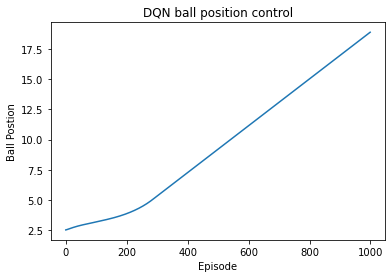

In [48]:
plt.plot(x_ball)
plt.xlabel("Episode")
plt.ylabel("Ball Postion")
plt.title("DQN ball position control")